In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import utilities_visuals as ut

In [2]:
# creates a heatmap that shows how opinions develop over time.
def plot_iterations(opinions_over_time, no_of_bins, lmts):

    # sets the upper and lower limits for the y-axis
    spread = np.floor(lmts[1])-np.ceil(lmts[0])

    stepsize = spread/no_of_bins

    # to show the data in a 2d heatmap, they are written into a 2d array
    data_in_proper_form = np.zeros((no_of_bins, len(opinions_over_time)))
    hel = len(data_in_proper_form)
    
    #restructuring data to allow for the heatmap to be generated
    for i in range(len(opinions_over_time)):
        for j in range(hel):
            data_in_proper_form[j][i] = ut.count_no_of_occurence_in_intervall( (np.floor(lmts[1]))-stepsize*(j+1), (np.floor(lmts[1]))-stepsize*j,
                                                                            opinions_over_time[i])
    
    return data_in_proper_form, [0 , len(opinions_over_time), lmts[0] , lmts[1]]

In [3]:
# plot for showing both agents attitude over time in a 2d coordinate system
def twod_system(social, C,  opinions_over_time, opinions_over_time_two=None, peer_norm=None):
    
    f = plt.figure()
    
    no_of_iterations = opinions_over_time.shape[0]
    cmap = mpl.colormaps['Greens'].resampled(no_of_iterations) 
    # maps the movement of all agents with the help of colour change
    x_ = []
    y_ = []
    c = []
    # accumulates the data and the plots it into the plot
    for i in range(no_of_iterations):
        for j in range(opinions_over_time.shape[1]):
            x, y = opinions_over_time[i,j,:]
            x_.append(x)
            y_.append(y)
            c.append(cmap(i))
    
    plt.scatter(x_,y_, color=c, edgecolors="black")

    # accumulates the data for the second opinions_over_time supplied to allow a segregation between group and non group members
    if opinions_over_time_two is not None:
        c = []
        x_ = []
        y_ = []
        no_of_iterations = opinions_over_time_two.shape[0]
        cmap = mpl.colormaps['Greens'].resampled(no_of_iterations)                        
        for i in range(no_of_iterations):
            for j in range(opinions_over_time_two.shape[1]):
                x,y = opinions_over_time_two[i,j,:]
                x_.append(x)
                y_.append(y)
                c.append(cmap(i))

        plt.scatter(x_,y_, color=c, edgecolors="black")

    
    # if given, maps the change in peer norm over time
    if peer_norm is not None:
        x_ = []
        y_ = []
        c = []
        no_of_iterations = opinions_over_time.shape[0]
        cmap = mpl.colormaps['Blues'].resampled(no_of_iterations) 
        for i in range(len(peer_norm)):
            x,y = np.squeeze(np.asarray(C.dot(peer_norm[i])))
            x_.append(x)
            y_.append(y)
            c.append(cmap(i))
        
        plt.scatter(x_,y_, color=c, marker="x")

    # sets the correct x-axis and y-axis limits
    res = ut.calc_min_max_atts(C)
    plt.xlim(res[0])
    plt.ylim(res[1])
    plt.grid(True)

    plt.title("Attitudes over time")
    plt.xlabel("Attitude towards first behaviour")
    plt.ylabel("Attitude towards second behaviour")
    plt.show()

    return f

In [4]:
# creates a single plot that shows most of the collected data from a single model run. It includes the distribution of attitudes and evaluations, as well as the norms and the outcome measures over time
def create_one_peek_plot(matr, matrev, NO_OF_BINS, C, agents_in_index, norms, S):
    # set size of final plot
    fig = plt.figure(figsize=(9,10))
    # sets the structure of the subplots
    axs = fig.subplot_mosaic(
        """
        aa
        bb
        cc
        dd
        ee
        ff
        gh
        """
    ,height_ratios=[5,5,5,5,5,5,1])
    plt.subplots_adjust(hspace=1)
    #axs = gs.subplots(sharex=False, sharey=False)
    fig.suptitle('Trajectories of a single simulation run', fontsize=10, y=0.95)

    fontsize = 8
    # calulates the maximal and minimal possible attitude based on C
    lims = ut.calc_min_max_atts(C)

    # calculated the peer norm attitude based on the peer group norm
    peer_att = np.dot(norms, C.transpose())

    # calculated the social norm attitude based on the social norm and expands it into a list
    soz_norm = np.dot(C, S.transpose()).transpose()
    soz_help = np.ones((len(peer_att),2))
    for i in range(len(soz_help)):
        soz_help[i,:] = soz_norm

    cmap_in_group = mpl.cm.Greens
    cmap_in_group.set_under(color='white')

    cmap_out_group = mpl.cm.Blues
    cmap_out_group.set_under(color='white')

    # sets the max values for the heatmap creation to ensure that results throughout different subplots are comparable
    _max_external = matr.shape[1] - len(agents_in_index)
    _max_group = len(agents_in_index)

    # creates the first subplot which shows the distribution of attitudes towards the first behaviour. The norms are added as lines and the group and non group members are colered differently
    att=0
    axs_key = 'a'
    data_in, extent = plot_iterations(list(matr[:,agents_in_index,att]), NO_OF_BINS, (lims[1][0]-0.1, lims[1][1]+0.1))
    data_out, extent = plot_iterations(list(np.delete(matr[:,:,att], agents_in_index, axis=1)), NO_OF_BINS, (lims[1][0]-0.1, lims[1][1]+0.1))
    axs[axs_key].plot(peer_att[:,att], color='green')
    axs[axs_key].plot(soz_help[:,att], color='blue')
    cont2 = axs[axs_key].imshow(data_out, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max_external)
    cont1 = axs[axs_key].imshow(data_in, extent = extent, cmap=cmap_in_group, interpolation='None', aspect='auto', alpha=0.5, vmin=0.001, vmax = _max_group)
    axs[axs_key].set_title(f"Distribution of attitude towards behaviour {att+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)
    axs[axs_key].tick_params(axis="x", labelsize=fontsize)

    # creates the second subplot which shows the distribution of attitudes towards the second behaviour. The norms are added as lines and the group and non group members are colered differently
    att=1
    axs_key = 'b'
    data_in, extent = plot_iterations(list(matr[:,agents_in_index,att]), NO_OF_BINS, (lims[1][0]-0.1, lims[1][1]+0.1))
    data_out, extent = plot_iterations(list(np.delete(matr[:,:,att], agents_in_index, axis=1)), NO_OF_BINS, (lims[1][0]-0.1, lims[1][1]+0.1))
    axs[axs_key].plot(peer_att[:,att], color='green')
    axs[axs_key].plot(soz_help[:,att], color='blue')
    cont2 = axs[axs_key].imshow(data_out, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max_external)
    cont1 = axs[axs_key].imshow(data_in, extent = extent, cmap=cmap_in_group, interpolation='None', aspect='auto', alpha=0.5, vmin=0.001, vmax = _max_group)
    axs[axs_key].set_title(f"Distribution of attitude towards behaviour {att+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)
    axs[axs_key].tick_params(axis="x", labelsize=fontsize)

    # creates the third subplot which shows the outcome measures over time. The included outcome measures are the pairwise distance, and the bias
    pw_mean = ut.mean_pairwise_distance(matr)
    bias_d = ut.calc_bias(matr)
    #compl_link = ut.calc_complete_linkage(matr, agents_in_index)
    axs['c'].plot(pw_mean, label="Mean of pairwise distances", color = "blue")
    #axs['c'].plot(compl_link, label="Complete Linakge", color = "red")
    axs['c'].plot(bias_d, label="Distance of average attitude vector (bias)", color="green")
    axs['c'].set_title("Outcome measures over time", fontsize=fontsize)
    axs['c'].set_ylim(0, ut.max_mean_pairwise_distance(C))
    #axs['c'].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axs['c'].legend(loc='center left', fontsize=6)
    axs['c'].set_xlim([0,len(matr)])

    # creates the fourth subplot which shows the distribution of attitudes towards the first evaluation of outcomes.
    eval = 0
    axs_key = 'd'
    data_in, extent = plot_iterations(list(matrev[:, agents_in_index, eval]), NO_OF_BINS, (-0.1,1.1))
    data_out, extent = plot_iterations(list(np.delete(matrev[:, :, eval], agents_in_index, axis=1)), NO_OF_BINS, (-0.1,1.1))
    cont2 = axs[axs_key].imshow(data_out, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max_external)
    cont1 = axs[axs_key].imshow(data_in, extent = extent, cmap=cmap_in_group, interpolation='None', aspect='auto', alpha=0.5, vmin=0.001, vmax = _max_group)
    axs[axs_key].set_title(f"Distribution of evaluations of outcome {eval+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)

    # creates the fifth subplot which shows the distribution of attitudes towards the second evaluation of outcomes.
    eval = 1
    axs_key = 'e'
    data_in, extent = plot_iterations(list(matrev[:, agents_in_index, eval]), NO_OF_BINS, (-0.1,1.1))
    data_out, extent = plot_iterations(list(np.delete(matrev[:, :, eval], agents_in_index, axis=1)), NO_OF_BINS, (-0.1,1.1))
    cont2 = axs[axs_key].imshow(data_out, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max_external)
    cont1 = axs[axs_key].imshow(data_in, extent = extent, cmap=cmap_in_group, interpolation='None', aspect='auto', alpha=0.5, vmin=0.001, vmax = _max_group)
    axs[axs_key].set_title(f"Distribution of evaluations of outcome {eval+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)

    # creates the sixth subplot which shows the distribution of attitudes towards the third evaluation of outcomes.
    eval = 2
    axs_key = 'f'
    data_in, extent = plot_iterations(list(matrev[:, agents_in_index, eval]), NO_OF_BINS, (-0.1,1.1))
    data_out, extent = plot_iterations(list(np.delete(matrev[:, :, eval], agents_in_index, axis=1)), NO_OF_BINS, (-0.1,1.1))
    cont2 = axs[axs_key].imshow(data_out, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max_external)
    cont1 = axs[axs_key].imshow(data_in, extent = extent, cmap=cmap_in_group, interpolation='None', aspect='auto', alpha=0.5, vmin=0.001, vmax = _max_group)
    axs[axs_key].set_title(f"Distribution of evaluations of outcome {eval+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)

    # adds two colorbars, to ease interpretation of the graphics
    plt.colorbar(cont2, cax=axs['g'], shrink=0.3, orientation='horizontal')
    plt.colorbar(cont1, cax=axs['h'], shrink=0.3, orientation='horizontal')
    
    return fig

In [6]:
# restores the variables from another notebook
%store -r params
%store -r loal
%store -r norms
%store -r lovl
%store -r agents_in_index
matr = ut.rearrange_attitude_list(loal)

matrev = ut.rearrange_attitude_list(lovl)

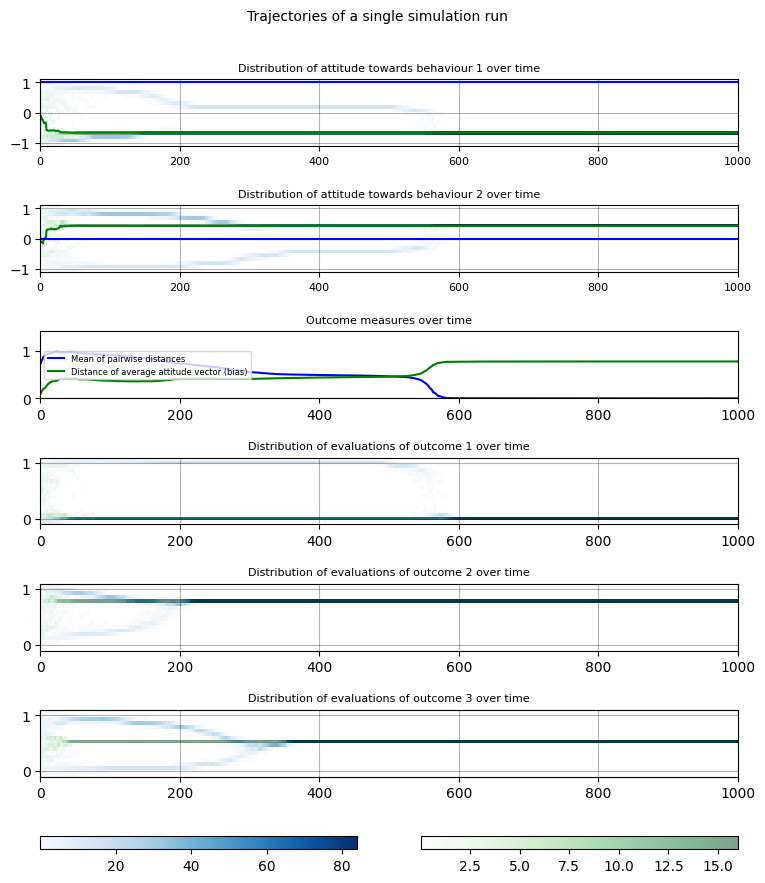

In [7]:
#creates the one look peek for a single simulation
fig = create_one_peek_plot(matr, matrev, 18, params['C'], agents_in_index, norms, params['Society'])

In [43]:
# saves the graphic as a pdf file for later use.
from pathlib import Path
fn = Path(f"~/Desktop/example_ß{params['ß']}_c{params['compliance']}_p{params['group_interaction']}.pdf").expanduser()
fig.savefig(fn, bbox_inches='tight', pad_inches=0)

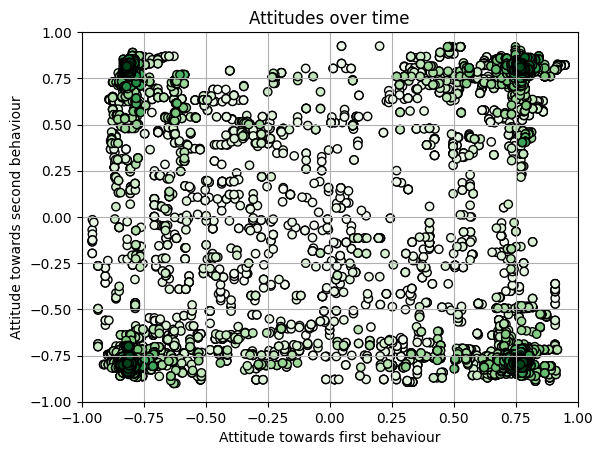

In [101]:
# creates the 2d-system for specified range of iterations
lo = 0
up = matr.shape[0]-900
fig = twod_system(params["Society"], params["C"], matr[lo:up,:,:], peer_norm = norms[lo:up])

In [103]:
# saves the graphic as a pdf file for later use.
from pathlib import Path
fn = Path(f"~/Desktop/2d_{lo}to{up}_{params['ß']}_c{params['compliance']}_p{params['group_interaction']}.pdf").expanduser()
fig.savefig(fn, bbox_inches='tight', pad_inches=0)